# Fake News Detection using NLP

* Project Type - Machine Learning–Based Classification Project using NLP
* Contribution - Individual
* Member Name - Sushant Thite

### **Project Summary -**
This project presents an automated **Fake News Detection** system developed using **Natural Language Processing (NLP)** and **supervised machine learning** techniques. The system was trained on real-world datasets containing both **real and fake news articles**, where textual data was preprocessed and transformed into numerical features using **TF-IDF vectorization.**

Multiple machine learning models—**Logistic Regression, Decision Tree, Random Forest, and Multinomial Naive Bayes**—were implemented and evaluated using standard metrics such as accuracy, precision, recall, and F1-score. Experimental results showed that **Random Forest and Decision Tree achieved very high accuracy on test data, indicating strong performance on full-length news articles.**

However, during manual testing with **short news titles**, it was observed that some high-performing models produced incorrect predictions due to **sparse input features and differences between training and real-world data distribution.** In contrast, the **Multinomial Naive Bayes model**, despite having comparatively lower overall accuracy, demonstrated better generalization for short and sparse text inputs such as titles.

This observation highlights the importance of **real-world validation beyond standard evaluation metrics** and demonstrates that **model selection should depend on the nature of the input data.** Overall, the project successfully illustrates the strengths and limitations of different machine learning models for fake news detection and provides a strong foundation for future improvements using **context-aware and deep learning-based approaches.**

#### **Problem statement:** 
The widespread availability of digital news platforms has made it easier to disseminate information quickly, but it has also increased the spread of fake and misleading news. Manual verification of news content is time-consuming, error-prone, and not scalable, especially given the massive volume of online content generated daily.

There is a critical need for an automated, accurate, and scalable system that can analyze news articles and determine whether they are real or fake based on textual patterns. Existing methods struggle with large-scale data and evolving language, making automated fake news detection a challenging yet essential problem.

#### **Business Objective:**

The primary business objective of this project is to develop a fake news detection model using Natural Language Processing (NLP) techniques that can assist organizations in efficiently identifying, filtering, and distinguishing fake news from real news, thereby reducing the spread of misinformation and improving content credibility.

## Step 1: Import Necessary Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUSHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUSHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Load and Explore the Dataset

In [19]:
# Load the dataset
true= pd.read_csv('True.csv')
false= pd.read_csv('Fake.csv')

# Add labels to indicate real(1) and fake(0) news
true['label'] = 1
false['label'] = 0

# Concatenate both datasets
data = pd.concat([true, false])

In [21]:
#True dataset
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [23]:
#Fake dataset
false.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [57]:
data

,title,text,subject,date,label
0,"[u.s., budget, fight, looms, ,, republicans, f...","[washington, (, reuters, ), -, head, conservat...",politicsNews,"December 31, 2017",1
1,"[u.s., military, accept, transgender, recruits...","[washington, (, reuters, ), -, transgender, pe...",politicsNews,"December 29, 2017",1
2,"[senior, u.s., republican, senator, :, 'let, m...","[washington, (, reuters, ), -, special, counse...",politicsNews,"December 31, 2017",1
3,"[fbi, russia, probe, helped, australian, diplo...","[washington, (, reuters, ), -, trump, campaign...",politicsNews,"December 30, 2017",1
4,"[trump, wants, postal, service, charge, 'much,...","[seattle/washington, (, reuters, ), -, preside...",politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,"[mcpain, :, john, mccain, furious, iran, treat...","[21st, century, wire, says, 21wire, reported, ...",Middle-east,"January 16, 2016",0
23477,"[justice, ?, yahoo, settles, e-mail, privacy, ...","[21st, century, wire, says, familiar, theme, ....",Middle-east,"January 16, 2016",0
23478,"[sunnistan, :, us, allied, ‘, safe, zone, ’, p...","[patrick, henningsen, 21st, century, wireremem...",Middle-east,"January 15, 2016",0
23479,"[blow, $, 700, million, :, al, jazeera, americ...","[21st, century, wire, says, al, jazeera, ameri...",Middle-east,"January 14, 2016",0


## Step 3: Data Preprocessing

In [25]:
# Lowercase and tokenization
data['text'] = data['text'].str.lower()
data['title'] = data['title'].str.lower()
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

## Step 4: Feature Extraction (TF-IDF)

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))


## Step 5: Split the Data into Training and Testing Sets

In [29]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


# Step 6: Model Training

 Training our model with different algorithms using the training data and evaluating its performance on the testing data.



# **Multinomial Naive Bayes Model**

Accuracy: 0.94


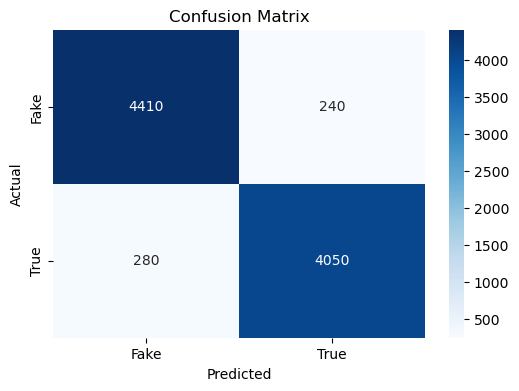

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [33]:
# initialize and train the MNB model
mnb_model= MultinomialNB()
mnb_model.fit(X_train, y_train)

# predict on the test data
y_pred = mnb_model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("Classification Report:")
print(classification_rep)


# **Decision Tree**

Accuracy: 0.9971046770601336


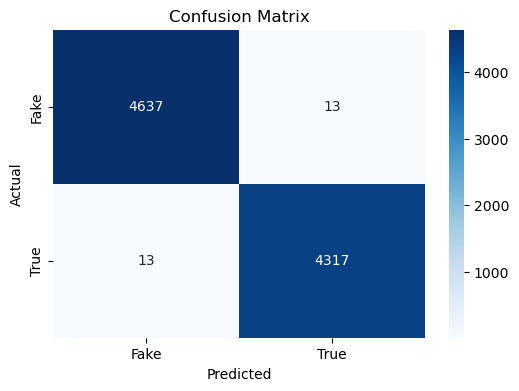

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [35]:
from sklearn.tree import DecisionTreeClassifier

# define and train the decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)

# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("Classification Report")
print(classification_rep)



# **Random Forest**

Accuracy: 0.9985523385300669


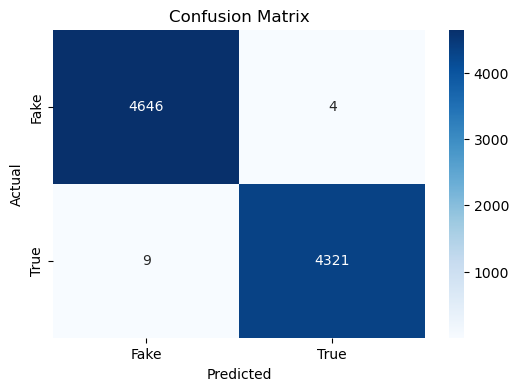

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [37]:
from sklearn.ensemble import RandomForestClassifier

# define and train the random forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

# confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','True'], yticklabels=['Fake','True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification report")
print(classification_rep)




# **Logistic Regression**

Accuracy: 0.9918708240534521


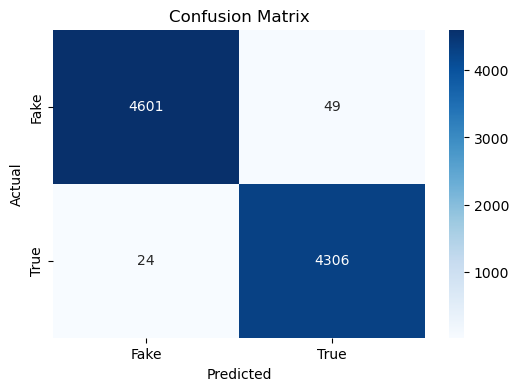

Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [41]:
from sklearn.linear_model import LogisticRegression

# define and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

#confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','True'], yticklabels=['Fake','True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

print("Classification report")
print(classification_rep)

## Step 7: Model Validation and Evaluation


# **Logistic Regression**

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

lr_test_predictions = logistic_regression.predict(X_test)

lr_test_accuracy=accuracy_score(y_test, lr_test_predictions)
lr_test_precision = precision_score(y_test, lr_test_predictions)
lr_test_recall = recall_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions)

print("Logistic Regression test Accuracy:", lr_test_accuracy)
print("Logistic Regression test Precision:", lr_test_precision)
print("Logistic Regression test Recall:", lr_test_recall)
print("Logistic Regression test F1 Score:", lr_test_f1)



Logistic Regression test Accuracy: 0.9918708240534521
Logistic Regression test Precision: 0.9887485648679678
Logistic Regression test Recall: 0.9944572748267898
Logistic Regression test F1 Score: 0.991594703511802


# **Random forest**

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

rf_test_predictions = random_forest.predict(X_test)

rf_test_accuracy=accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

print("Random Forest test Accuracy:", rf_test_accuracy)
print("Random Forest test Precision:", rf_test_precision)
print("Random Forest test Recall:", rf_test_recall)
print("Random Forest test F1 Score:", rf_test_f1)


Random Forest test Accuracy: 0.9985523385300669
Random Forest test Precision: 0.9990751445086705
Random Forest test Recall: 0.9979214780600462
Random Forest test F1 Score: 0.9984979780473715


# **Decision Tree**

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

dt_test_predictions = decision_tree.predict(X_test)

dt_test_accuracy=accuracy_score(y_test, dt_test_predictions)
dt_test_precision = precision_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)

print("Decision Tree test Accuracy:", dt_test_accuracy)
print("Decision Tree test Precision:", dt_test_precision)
print("Decision Tree test Recall:", dt_test_recall)
print("Decision Tree test F1 Score:", dt_test_f1)


Decision Tree test Accuracy: 0.9971046770601336
Decision Tree test Precision: 0.9969976905311778
Decision Tree test Recall: 0.9969976905311778
Decision Tree test F1 Score: 0.9969976905311778


# **Multinominal Naive Bayes**

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

mnb_test_predictions=mnb_model.predict(X_test)

mnb_test_accuracy=accuracy_score(y_test, mnb_test_predictions)
mnb_test_precision=precision_score(y_test,mnb_test_predictions)
mnb_test_recall=recall_score(y_test,mnb_test_predictions)
mnb_test_f1=f1_score(y_test,mnb_test_predictions)

print("MNB test Accuracy:", mnb_test_accuracy)
print("MNB test Precision:", mnb_test_precision)
print("MNB test Recall:", mnb_test_recall)
print("MNB test F1 Score:", mnb_test_f1)


MNB test Accuracy: 0.9420935412026726
MNB test Precision: 0.9440559440559441
MNB test Recall: 0.9353348729792148
MNB test F1 Score: 0.9396751740139211


<Figure size 1200x800 with 0 Axes>

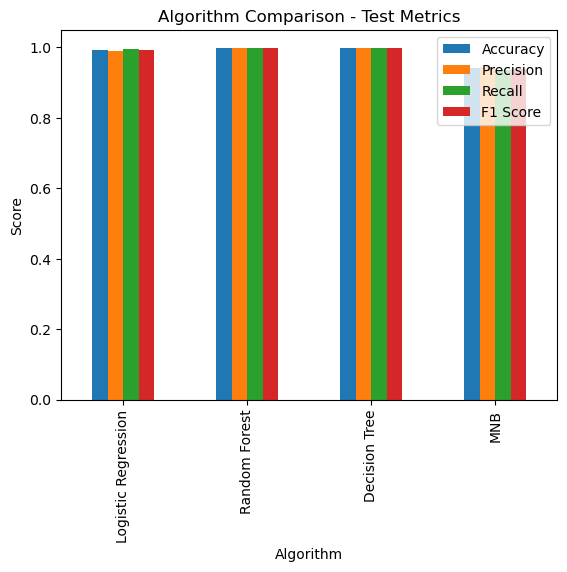

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'MNB']
accuracy_scores = [lr_test_accuracy, rf_test_accuracy, dt_test_accuracy, mnb_test_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, dt_test_precision, mnb_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, dt_test_recall, mnb_test_recall,]
f1_scores = [lr_test_f1, rf_test_f1, dt_test_f1, mnb_test_f1,]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algorithm', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison - Test Metrics')
plt.xticks()
plt.legend(loc='upper right')
plt.show()


# **MODEL VALIDATION**
## *News Prediction*

In [110]:
import nltk
from nltk.corpus import stopwords
# function for predicting news
def predict_title(title_text):
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    prediction = mnb_model.predict(tfidf_vector)

    return prediction

# example news
title_text_1 = "Republican House Speaker Ryan told Trump retirement report was rumors were not true: White House"
title_text_2 = "Drunk Bragging Trump Staffer Started Russian Collusion Investigation"

# prediction
prediction_1 = predict_title(title_text_1)
prediction_2 = predict_title(title_text_2)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely fake.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely fake.")


Title 1: The news is likely true.
Title 2: The news is likely fake.
